# DSC 550 

### Week 10:  Exercise 10.2

Author: Kimberly Cable<br>
Date: 8-13-2022

## Exercise 10.2: Building a CNN Image Classifier

In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

In [31]:
# import libraries
import numpy as np
import itertools
import pandas as pd
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.utils import np_utils
from keras import backend as K

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

**1. Load the MNIST data set.**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Get shape of the data
n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

print(f"Training: {n_train}")
print(f"Test: {n_test}")
print(f"Height: {height}")
print(f"Width: {width}")

Training: 60000
Test: 10000
Height: 28
Width: 28


**2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.**

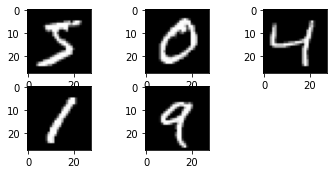

In [4]:
# Display first 5 images
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

plt.show()

**3. Build and train a Keras CNN classifier on the MNIST training set.**

In [5]:
# Reshape data into features
X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

In [6]:
# Normalize from [0, 255] to [0, 1]
X_train /= 255
X_test /= 255

In [7]:
# numbers 0-9, so ten classes
n_classes = 10

In [8]:
# convert integer labels into one-hot vectors
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [9]:
# Start nural network
model = Sequential()

In [10]:
# number of convolutional filters
n_filters = 64

# convolution filter size
# i.e. we will use a n_conv x n_conv filter
n_conv = 5

# pooling window size
# i.e. we will use a n_pool x n_pool pooling window
n_pool = 2

In [11]:
# add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
model.add(Conv2D(
        n_filters, 
        kernel_size=(n_conv, n_conv),
        # we have a 28x28 single channel (grayscale) image
        # so the input shape should be (28, 28, 1)
        input_shape=(height, width, 1)
))
model.add(Activation('relu'))

model.add(Conv2D(n_filters, kernel_size=(n_conv, n_conv)))
model.add(Activation('relu'))

# then we apply pooling to summarize the features
# extracted thus far
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))

In [12]:
model.add(Dropout(0.25))

# flatten the data for the 1D layers
model.add(Flatten())

# Dense(n_outputs)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# the softmax output layer gives us a probablity for each class
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [13]:
# Compile the neural network
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [14]:
# how many examples to look at during each update step
batch_size = 1000

# how many times to run through the full set of examples
n_epochs = 2

# fit the model
model.fit(X_train,
          y_train,
          batch_size = batch_size,
          epochs = n_epochs,
          validation_data = (X_test, y_test))

Epoch 1/2
60/60 [==============================] - 73s 1s/step - loss: 0.4677 - accuracy: 0.8505 - val_loss: 0.0851 - val_accuracy: 0.9724
Epoch 2/2
60/60 [==============================] - 74s 1s/step - loss: 0.1075 - accuracy: 0.9681 - val_loss: 0.0508 - val_accuracy: 0.9839


**4. Report the test accuracy of your model.**

In [15]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0, batch_size = 200)

print('loss:', loss)
print('accuracy:', accuracy)

loss: 0.05077590420842171
accuracy: 0.9839000105857849


In [16]:
y_predict = np.argmax(model.predict(X_test), axis = 1)
y_test_max = np.argmax(y_test,axis = 1) 

**5. Display a confusion matrix on the test set classifications.**

In [17]:
cm = confusion_matrix(y_test_max, y_predict)
print(cm)

[[ 974    1    0    0    0    1    1    1    1    1]
 [   0 1133    1    0    0    1    0    0    0    0]
 [   2    3 1017    0    2    0    0    6    2    0]
 [   0    0    2  999    0    6    0    3    0    0]
 [   1    0    0    0  971    0    1    1    0    8]
 [   1    0    0    2    0  888    1    0    0    0]
 [   7    3    0    0    2    6  940    0    0    0]
 [   0    4    6    0    0    1    0 1007    1    9]
 [   9    1    3    2    4   11    4    3  923   14]
 [   2    4    0    1    5    7    0    3    0  987]]


In [18]:
# Create a dataframe for a array-formatted Confusion matrix
cm_df = pd.DataFrame(cm,
                     index = range(10), 
                     columns = range(10))

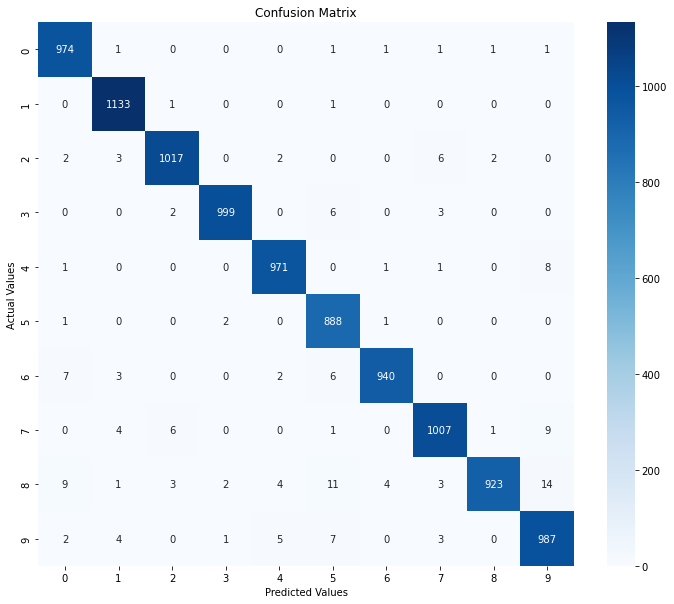

In [29]:
# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**6. Summarize your results.**

In [33]:
# Get the classification report
class_list = [str(item) for item in range(10)]

classification_rpt = classification_report(y_test_max, y_predict, target_names = class_list)
print(classification_rpt)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.95      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

